In [ ]:
"""
데이터 프레임 정렬: sort_values()
튜플 정렬: sorted()
리스트 정렬: sort(), sorted(list)

"""

In [1]:
import pandas as pd
import numpy as np

In [2]:
help(pd.DataFrame.sort_values)

Help on function sort_values in module pandas.core.frame:

sort_values(self, by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
    Sort by the values along either axis.
    
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels
    
                .. versionchanged:: 0.23.0
                   Allow specifying index or column level names.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must match the length of
         the by.
    inplace : bool, default 

In [3]:
df = pd.DataFrame({'seq':['10','30',np.nan],
                   'name':['park','kim','choi'],
                   'age':[25,35,22]})
df            

,seq,name,age
0,10,park,25
1,30,kim,35
2,NaN,choi,22


In [4]:
df.sort_values(by='seq', ascending=False) #내림차순 정렬
df.sort_values(by='seq', ascending=False, inplace=True, na_position='first') #기존의 df가 변경
df

,seq,name,age
2,NaN,choi,22
1,30,kim,35
0,10,park,25


In [5]:
tup = [(1,'kim',25),(3,'lee',20),(2,'park',15)]
# sorted(튜플변수, 기준)
sorted(tup)
sorted(tup, key=lambda p:p[0])
sorted(tup, key=lambda p:p[1])
sorted(tup, key=lambda p:p[2], reverse=True) #내림차순

[(1, 'kim', 25), (3, 'lee', 20), (2, 'park', 15)]

In [6]:
myList = [0,1,2,5,4,7,8,6,3]
sorted(myList)
myList

myList.sort() #정렬된 결과가 저장됨
myList

sorted(myList, reverse=True)  #내림차순
myList

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [7]:
s1 = pd.Series([3,1,4,2,5])
s1
s1[2]
s1[:3] #3,1,4출력
#열 평균값보다 큰 데이터만 추출
s1[s1 > s1.mean()]
s1[[4,2]]

4    5
2    4
dtype: int64

In [8]:
s = pd.Series([10,20,30,40,50], index=['a','b','c','d','e'])
s

a    10
b    20
c    30
d    40
e    50
dtype: int64

In [9]:
s['a']
s[['a','c','e']]
s.get(['a','c','e'])
s['c'] = 300
'c' in s #s에 'c'라벨 index가 있습니까?
'z' in s

False

In [10]:
df = pd.DataFrame({'c1':[1,2,3], 
                   'c2':[4,5,6],
                   'c3':[7,8,np.nan]}, index=['r1','r2','r3'])
# df.info() #R언어에서는 str()
df.index
df.columns

Index(['c1', 'c2', 'c3'], dtype='object')

In [11]:
df13 = pd.DataFrame(df)
df13

df13 = pd.DataFrame(df, index=['r1','r3'])
df13

# c1과 c3열을 추출 -> 데이터프레임
dfc13 = pd.DataFrame(df, columns=['c1','c3'])
dfc13

# r3, r1행, c3, c1열을 추출
rfrc13 = pd.DataFrame(df, index=['r3','r1'], columns=['c3','c1'])
rfrc13

,c3,c1
r3,NaN,3
r1,7.0,1


In [12]:
#데이터프레임 컬럼 추가 
#df['컬럼명']=데이터
df['c4'] = df['c1']+df['c2']
df
df = df.assign(c5=df['c1']*df['c2'])
df

df.assign(c6=lambda x:x.c1-x.c2) #x에는 df가 전달

,c1,c2,c3,c4,c5,c6
r1,1,4,7.0,5,4,-3
r2,2,5,8.0,7,10,-3
r3,3,6,NaN,9,18,-3


In [13]:
#데이터프레임 컬럼 삭제
#df.drop()
#del명령

df.drop(['c4'], axis=1)
#c2, c4, c5열 제거
df.drop(['c2','c4','c5'], axis=1)

#r2헹 제거
df.drop(['r2'], axis=0) #default : axis=0

,c1,c2,c3,c4,c5
r1,1,4,7.0,5,4
r3,3,6,NaN,9,18


In [14]:
del df['c2']

In [15]:
df

,c1,c3,c4,c5
r1,1,7.0,5,4
r2,2,8.0,7,10
r3,3,NaN,9,18


In [16]:
del df['c4']
df

,c1,c3,c5
r1,1,7.0,4
r2,2,8.0,10
r3,3,NaN,18


In [17]:
df
df[ df['c1']<=2]  #df[True,True,False] => True에 해당하는 행 추출

,c1,c3,c5
r1,1,7.0,4
r2,2,8.0,10


In [18]:
col_sel = ['c1','c3']
df[col_sel]

,c1,c3
r1,1,7.0
r2,2,8.0
r3,3,NaN


In [19]:
# numpy:ndarray(벡터연산)=>연산 결과가 빠름
arr1 = np.array([1,2,3,4])
mylist = [5,6,7,8]
arr2 = np.array(mylist)
arr1.shape
arr1.dtype

# mylist = np.asarray(mylist)
# type(mylist)

#np.asfarray(mylist)  #float

# mylist
mylist = [5,6,7,np.inf]  #무한수가 있기 때문에 에러
np.asarray_chkfinite(mylist) #array로 변환시, 무한수(inf) 또는 결측값(NaN)이 있는지 확인해라

ValueError: array must not contain infs or NaNs

In [97]:
np.zeros(5)
np.ones(10)

np.ones(5)*2 #벡터화 연산
np.empty(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [99]:
np.zeros((2,5)) #다차원 배열의 초기화
np.ones((2,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [104]:
arr = np.arange(12)
arr = arr.reshape(3,4)

In [106]:
np.zeros_like(arr)
np.ones_like(arr)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [108]:
np.eye(3)  #단위(항등)행렬: 대각요소 1, 나머지 0
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [113]:
np.random.normal(size=5) #정규분포로부터 개수가 1인 무작위 샘플 추출

np.random.seed(seed=777)
np.random.normal(size=5)
np.random.normal(size=(2,5))

array([[ 0.76623673,  0.82605407, -1.32368279, -1.75244452,  1.00244907],
       [ 0.54480945,  1.8951609 , -0.76935745, -1.40309592, -0.63246751]])

In [ ]:
"""
이항분포

모집단 - 확률분포 -> 분위수에 대한 확률, 특정 확률에 해당되는 분위수 계산
확률분포를 이용해서 난수를 발생

확률분포: 연속형 확률 분포, 이산형 확률 분포
연속형 확률 분포: 정규분포, t분포, f-분포, 균등분포
이산형 확률 분포: 이항분포, 포아송, 초기화 분포

이항분포? 성공확률이 p인 베르누이 시행을 n번 반복했을 때 성공 횟수를 x라고 하면,
확률변수 x는 모수 n과 p인 이항분포를 따른다.
이항분포=nCx*p의 x승*(1-p)의 n-x승 (n번 중 x번 성공)

베르누이 시행: 각 시행마다 성공/실패의 경우의 수만 나오는 시행

"""

In [116]:
np.random.binomial(n=1, p=0.5, size=20)

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [123]:
#numpy:boolean, int, float, string
#숫자형/문자형

x = np.array([3,2,4,5])
x.dtype #dtype('int32')

x = np.array([3.2,2.5,4.1,5.2], dtype=np.float32)
x.dtype #dtype('float64')

x = np.array([3.2,2.5,4.1,5.2], dtype=np.int32)
x.dtype #dtype('int32')
x

x = np.int32([1.5,2.4])
x

array([1, 2])

In [126]:
#데이터 타입 변환
#데이터, astype(변환타입)
x
x.astype(np.float64)
x.dtype

dtype('int32')

In [134]:
x = np.float64([3,2,1])
x
#int64로 변경
x = x.astype(np.int64)
x

x = x.astype(np.string_)
x.dtype

dtype('S21')

In [135]:
#두 배열의 차원이 같아야 연산 가능
#차원이 다르면 broadcasting을 통해 차원을 동일하게 함

x = np.array([1.,1.,2.,2.])
y = np.array([1.,2.,3.,4.])

In [141]:
y+1
#배열+스칼라
y/2
y//2 #몫
y%2
y**2

array([ 1.,  4.,  9., 16.])

In [142]:
a = np.arange(1000000)
a

array([     0,      1,      2, ..., 999997, 999998, 999999])

In [143]:
%timeit a+1  #뒤의 문장을 실행하는데 걸리는 시간을 계산

2.35 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [144]:
%timeit [i+1 for i in a]

386 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [145]:
x

array([1., 1., 2., 2.])

In [146]:
y

array([1., 2., 3., 4.])

In [153]:
x+y #element wise sum : 요소 간 덧셈
x-y 
x*y
x/y
x//y
x%y
x**y

array([ 1.,  1.,  8., 16.])

In [158]:
np.equal(x,y) #요소 간 같은 값인지 확인
np.not_equal(x,y)

np.greater(x,y) #왼쪽 요소가 기준: x>y
np.greater_equal(x,y) #x>=y
np.less(x,y) #x<y
np.less_equal #x<=y

#배열 전체 비교
np.array_equal(x,y)
np.array_equal(x,x)

True

In [162]:
x
y
x+=y #x-=y, x*=y, x**=y
x

array([ 3.,  5.,  8., 10.])

In [165]:
x = np.array([1,1,0,0])
y = np.array([1,0,1,0])
np.logical_and(x,y) #두 요소가 모두 1일때만 True, 나머지는 False
np.logical_or(x,y) #적어도 하나가 1일때 True
np.logical_xor(x,y) #두 요소가 서로 배타적일때 True(하나가 1일때, 다른 하나는 0이면 배타적)

array([False,  True,  True, False])

In [167]:
#소속 여부 확인? in, not in
#객체 in 배열: 배열에 객체가 있으면 True
a = 'x'
b = np.array(['x','y'])

In [169]:
a in b #True
'z' not in b

True

In [173]:
x = np.array([1.,1.,2.,2.])
y = np.arange(5)
#x+y 에러: 두 배열간 차원이 같아야 연산 가능

In [176]:
ar = np.array([1,2,3,4])
ar.shape #    +
ar+1 # 1 => 1,1,1,1 => 2,3,4,5

array([2, 3, 4, 5])

In [178]:
df = pd.DataFrame({'x1':[1,2,3], 'x2':[4,5,6]})
df
df+1
"""
1 1
1 1
1 1
"""

,x1,x2
0,2,5
1,3,6
2,4,7


In [187]:
ar = np.arange(12).reshape(4,3)
print(ar)
ar2 = np.array([1,2,3])
print(ar2)
ar+ar2

#broadcating
# [1,2,3]
# =>
# [1,2,3]
# [1,2,3]
# [1,2,3]
# [1,2,3]

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[1 2 3]


array([[ 1,  3,  5],
       [ 4,  6,  8],
       [ 7,  9, 11],
       [10, 12, 14]])

In [190]:
ar = np.arange(12).reshape(4,3)
print(ar)

ar2 = np.array([1,2,3,4]).reshape(4,1)
print(ar2)
ar+ar2

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[1]
 [2]
 [3]
 [4]]


array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [196]:
train = pd.read_csv('train.csv')
#EDA(Exploratory data analysis)
train.head(80)
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [199]:
train.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

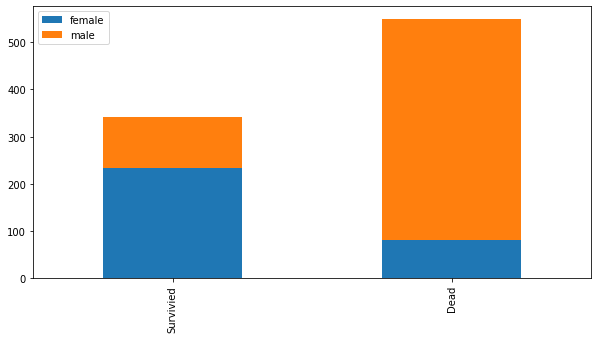

In [211]:
#생존자들의 성별에 따른 수
survived = train[train['Survived']==1]['Sex'].value_counts()

#사망자들의 성별에 따른 수
dead = train[train['Survived']==0]['Sex'].value_counts()
dead

#type(survived)
df = pd.DataFrame([survived, dead])
df.index = ['Survivied','Dead']
df

import matplotlib.pyplot as plt
df.plot(kind='bar', stacked=True, figsize=(10,5))

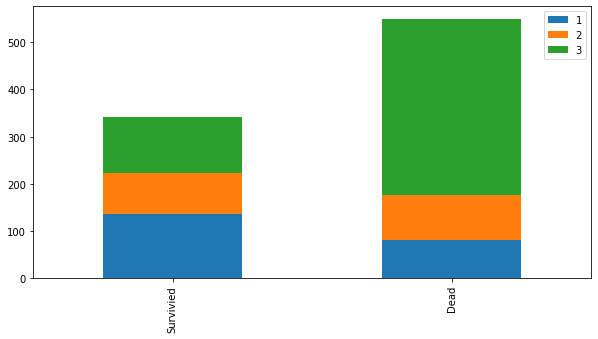

In [212]:
#생존자들의 좌석등급에 따른 수
survived = train[train['Survived']==1]['Pclass'].value_counts()

#사망자들의 좌석등급에 따른 수
dead = train[train['Survived']==0]['Pclass'].value_counts()
dead

#type(survived)
df = pd.DataFrame([survived, dead])
df.index = ['Survivied','Dead']
df

import matplotlib.pyplot as plt
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [217]:
def my_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()

    df = pd.DataFrame([survived, dead])
    df.index = ['Survivied','Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

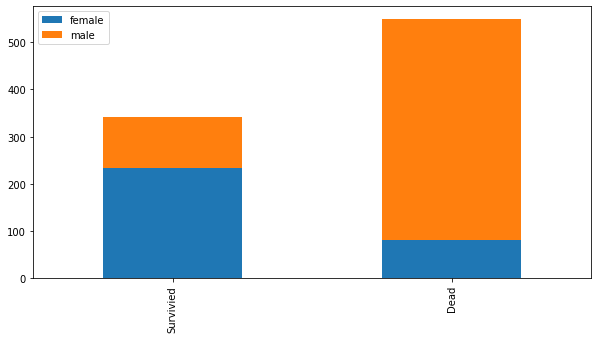

In [218]:
my_chart('Sex')

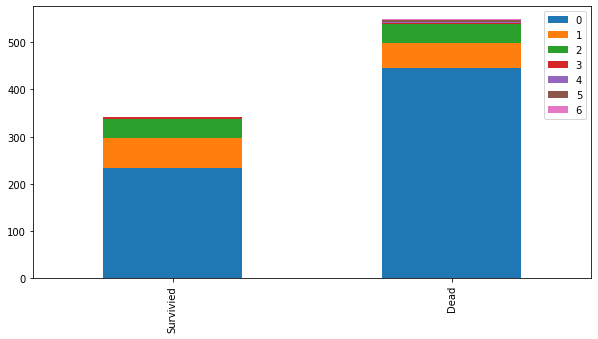

In [219]:
my_chart('Parch')

In [233]:
train['title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')
# train['Name']
train['title'].value_counts()

title_mapping = {'Mr':0, "Miss":1, "Mrs":2, "Master":3}
train['title'] = train['title'].map(title_mapping)
train['title'].value_counts()

0.0    517
1.0    182
2.0    125
3.0     40
Name: title, dtype: int64

In [235]:
train.drop('Name', axis=1, inplace=True)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,NaN
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,0.0


In [246]:
sex_mapping = {"male":0, "female":1}
train['Sex'] = train['Sex'].map(sex_mapping)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,NaN,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,NaN,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,NaN,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,NaN,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,NaN,27.0,0,0,211536,13.0000,NaN,S,NaN
887,888,1,1,NaN,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,NaN,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,NaN,26.0,0,0,111369,30.0000,C148,C,0.0


In [242]:
my_chart('Sex')

TypeError: no numeric data to plot

In [261]:
#16세 이하:0, 16~26이하:1, 26~36이하:2, 36~62:3, 62초과:4
# train[train['Age']<=16]['Age']=0
# train['Age']

train.loc[train['Age']<=16, 'Age']=0
train.loc[(train['Age']>16) & (train['Age']<=26), 'Age']=1
train.loc[(train['Age']>26) & (train['Age']<=36), 'Age']=2
train.loc[(train['Age']>36) & (train['Age']<=62), 'Age']=3
train.loc[train['Age']>62, 'Age']=4

In [262]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,NaN,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,NaN,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,NaN,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,NaN,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,NaN,2.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,NaN,2.0,0,0,211536,13.0000,NaN,S,NaN
887,888,1,1,NaN,1.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,NaN,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,NaN,1.0,0,0,111369,30.0000,C148,C,0.0


In [247]:
train[train['Age']<=19] == 0
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,NaN,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,NaN,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,NaN,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,NaN,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,NaN,27.0,0,0,211536,13.0000,NaN,S,NaN
887,888,1,1,NaN,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,NaN,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,NaN,26.0,0,0,111369,30.0000,C148,C,0.0
